In [35]:
# Data Analysis and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model Related
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel

# Evaluation
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Quick data exploration

In [4]:
# Proportion of customers that churned
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# Checking for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data processing

In [7]:
# Dropping the customer ID column
df = df.drop('customerID', axis = 1)

In [8]:
# Dropping empty TotalCharges
df = df.drop(df[df['TotalCharges'] == " "].index, axis = 0)
# Converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
# Checking categorical variable values
cat_col = df.drop(['MonthlyCharges', 'TotalCharges', 'tenure'], axis = 1).columns

In [10]:
for col in cat_col:
    print (col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [11]:
# Investigating why there is 0 in every column
df[df['gender'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [12]:
# Dropping columns with all 0
df = df.drop(df[df['gender'] == 0].index)

In [13]:
for col in cat_col:
    print (col, df[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [14]:
# Converting 'Yes' and 'No' to 1 and 0
binary_col = ["Partner", 
              "Dependents", 
              "PhoneService",
              "MultipleLines",
              "OnlineSecurity", 
              "OnlineBackup", 
              "DeviceProtection", 
              "TechSupport",
              "StreamingTV",
              "StreamingMovies",
              "PaperlessBilling",
              "Churn"]

df[binary_col] = df[binary_col].replace(to_replace=['No', 'Yes', 'No phone service', 'No internet service'], 
                                        value=[0, 1, 0, 0])

In [15]:
# Converting remaining categorical variables (gender, InternetService, Contract, PaymentMethod)
# Scale variable if ordinal
# Use dummy variables if nominal

nominal_col = ["gender",
               "InternetService",
               "Contract",
               "PaymentMethod"]

# Creating the dummy columns
gender_dummy = pd.get_dummies(df['gender'])
InternetService_dummy = pd.get_dummies(df['InternetService'])
Contract_dummy = pd.get_dummies(df['Contract'])
PaymentMethod_dummy = pd.get_dummies(df['PaymentMethod'])

# Dropping the original columns
df = df.drop(nominal_col, axis = 1)

# Concatenating dummy columns
df = pd.concat([df, gender_dummy], axis=1)
df = pd.concat([df, InternetService_dummy], axis=1)
df = pd.concat([df, Contract_dummy], axis=1)
df = pd.concat([df, PaymentMethod_dummy], axis=1)

In [16]:
# Saving the column names
col_names = df.columns

# Now we scale the remaining values
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns=col_names)

In [17]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.464789,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.619718,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Checking to see if there is any correlation between variables

In [18]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Female,Male,DSL,Fiber optic,No,Month-to-month,One year,Two year,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
SeniorCitizen,1,0.017,-0.21,0.016,0.0084,0.14,-0.039,0.067,0.06,-0.061,0.11,0.12,0.16,0.22,0.1,0.15,0.0018,-0.0018,-0.11,0.25,-0.18,0.14,-0.046,-0.12,-0.016,-0.024,0.17,-0.15
Partner,0.017,1,0.45,0.38,0.018,0.14,0.14,0.14,0.15,0.12,0.12,0.12,-0.014,0.098,0.32,-0.15,0.0014,-0.0014,-0.001,0.0012,-0.00029,-0.28,0.083,0.25,0.11,0.082,-0.083,-0.097
Dependents,-0.21,0.45,1,0.16,-0.0011,-0.024,0.081,0.024,0.014,0.063,-0.016,-0.038,-0.11,-0.11,0.065,-0.16,-0.01,0.01,0.052,-0.16,0.14,-0.23,0.069,0.2,0.052,0.061,-0.15,0.056
tenure,0.016,0.38,0.16,1,0.0079,0.33,0.33,0.36,0.36,0.33,0.28,0.29,0.0048,0.25,0.83,-0.35,-0.0053,0.0053,0.014,0.018,-0.038,-0.65,0.2,0.56,0.24,0.23,-0.21,-0.23
PhoneService,0.0084,0.018,-0.0011,0.0079,1,0.28,-0.092,-0.052,-0.07,-0.095,-0.021,-0.033,0.017,0.25,0.11,0.012,0.0075,-0.0075,-0.45,0.29,0.17,-0.0012,-0.0031,0.0044,0.0083,-0.0069,0.0027,-0.0045
MultipleLines,0.14,0.14,-0.024,0.33,0.28,1,0.099,0.2,0.2,0.1,0.26,0.26,0.16,0.49,0.47,0.04,0.0089,-0.0089,-0.2,0.37,-0.21,-0.089,-0.0036,0.11,0.075,0.06,0.084,-0.23
OnlineSecurity,-0.039,0.14,0.081,0.33,-0.092,0.099,1,0.28,0.27,0.35,0.18,0.19,-0.0041,0.3,0.41,-0.17,0.016,-0.016,0.32,-0.031,-0.33,-0.25,0.1,0.19,0.094,0.12,-0.11,-0.08
OnlineBackup,0.067,0.14,0.024,0.36,-0.052,0.2,0.28,1,0.3,0.29,0.28,0.27,0.13,0.44,0.51,-0.082,0.013,-0.013,0.16,0.17,-0.38,-0.16,0.084,0.11,0.087,0.09,-0.00036,-0.17
DeviceProtection,0.06,0.15,0.014,0.36,-0.07,0.2,0.27,0.3,1,0.33,0.39,0.4,0.1,0.48,0.52,-0.066,0.00081,-0.00081,0.15,0.18,-0.38,-0.23,0.1,0.17,0.083,0.11,-0.0033,-0.19
TechSupport,-0.061,0.12,0.063,0.33,-0.095,0.1,0.35,0.29,0.33,1,0.28,0.28,0.038,0.34,0.43,-0.16,0.0085,-0.0085,0.31,-0.02,-0.34,-0.29,0.096,0.24,0.1,0.12,-0.11,-0.085


## Creating a train test split for the model

In [19]:
X = df.iloc[:, df.columns != 'Churn']
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 101)

## Logistic Regression

In [20]:
# Defining the model
regressor = LogisticRegression(solver='lbfgs')
# Training the model
regressor.fit(X_train, y_train)
# Making predictions
preds = regressor.predict(X_test)
# Calculating accuracy
accuracy_score(y_test, preds)

0.8134243458475541

In [21]:
confusion_matrix(y_test, preds)

array([[1202,  127],
       [ 201,  228]])

### Using all the features, we get an accuracy of 81%

## Feature selection - RFE

In [22]:
# Defining the model
rfe_regressor = LogisticRegression(solver='lbfgs', max_iter=200)
# Creating an instance of RFECV
rfecv = RFECV(estimator = rfe_regressor, step = 1, cv = StratifiedKFold(10), scoring="accuracy")
# Training the model
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=200,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [23]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 18


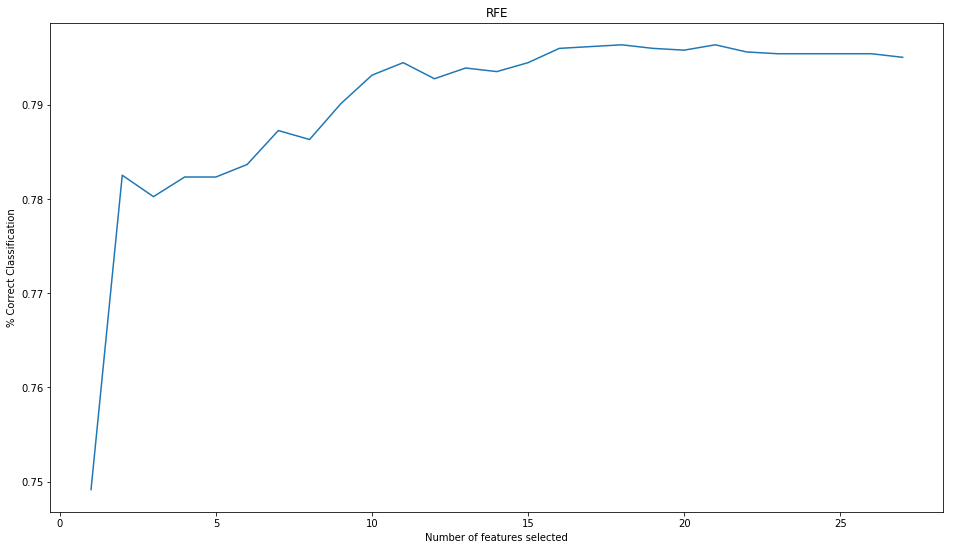

In [24]:
plt.figure(figsize=(16, 9))
plt.title('RFE')
plt.xlabel('Number of features selected')
plt.ylabel('% Correct Classification')
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)

plt.show()

In [25]:
print(np.where(rfecv.support_ == False)[0])

[ 1  8 15 16 17 21 23 24 26]


In [26]:
# Unimportant columns
X_train.columns[np.where(rfecv.support_ == False)[0]]

Index(['Partner', 'DeviceProtection', 'Female', 'Male', 'DSL', 'One year',
       'Bank transfer (automatic)', 'Credit card (automatic)', 'Mailed check'],
      dtype='object')

In [27]:
# Creating new dataframe
rfe_X_train = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis = 1)
rfe_X_test = X_test.drop(X_test.columns[np.where(rfecv.support_ == False)[0]], axis = 1)

In [28]:
# Training the model
rfe_regressor.fit(rfe_X_train, y_train)
# Making predictions
rfe_preds = rfe_regressor.predict(rfe_X_test)
# Calculating accuracy
accuracy_score(y_test, rfe_preds)

0.8128555176336746

In [29]:
confusion_matrix(y_test, rfe_preds)

array([[1202,  127],
       [ 202,  227]])

### Using 18 features, we get an accuracy of 81%

## Feature selection - SFM, Lasso

In [30]:
# Defining the model
sfm_regressor = LogisticRegression(penalty='l1')
# Creating an instance of RFECV
sfm = SelectFromModel(sfm_regressor, max_features=8)
# Training the model
sfm.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None,
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='warn',
                                             n_jobs=None, penalty='l1',
                                             random_state=None, solver='warn',
                                             tol=0.0001, verbose=0,
                                             warm_start=False),
                max_features=8, norm_order=1, prefit=False, threshold=None)

In [31]:
X_train.columns[sfm.get_support()]

Index(['tenure', 'PhoneService', 'OnlineSecurity', 'TotalCharges', 'DSL', 'No',
       'Month-to-month', 'Two year'],
      dtype='object')

In [32]:
sfm_X_train = X_train[X_train.columns[sfm.get_support()]]
sfm_X_test = X_test[X_train.columns[sfm.get_support()]]

In [33]:
# Training the model
sfm_regressor.fit(sfm_X_train, y_train)
# Making predictions
sfm_preds = sfm_regressor.predict(sfm_X_test)
# Calculating accuracy
accuracy_score(y_test, sfm_preds)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8020477815699659

In [34]:
confusion_matrix(y_test, sfm_preds)

array([[1194,  135],
       [ 213,  216]])

### Using 8 features, we get an accuracy of 80%